In [5]:
import numpy as np
import pandas as pd

In [2]:
original = [1,2,3,4,5,6,7,8,9,10]

In [3]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]
OOB Sample: [0.2, 0.3]


0.7198275862068966
0.7213822894168467
0.6866952789699571
0.6909871244635193
0.6417910447761194
0.6797385620915033
0.7248908296943232
0.6491596638655462
0.648068669527897
0.7245762711864406
0.6903225806451613
0.7111597374179431
0.683083511777302
0.7297872340425532
0.7016806722689075
0.6852248394004282
0.6623931623931624
0.6986899563318777
0.7008547008547008
0.6939655172413793
0.7010752688172043
0.7010752688172043
0.7064017660044151
0.6780383795309168
0.6751592356687898
0.6918238993710691
0.7056367432150313
0.6875
0.6419213973799127
0.7096774193548387
0.6946236559139785
0.7213822894168467
0.6340956340956341
0.6781115879828327
0.6938325991189427
0.6782608695652174
0.6931330472103004
0.6810344827586207
0.6845493562231759
0.6993603411513859
0.7158119658119658
0.6811279826464208
0.6947368421052632
0.6709129511677282
0.6828193832599119
0.6787330316742082
0.6694560669456067
0.6742738589211619
0.6919831223628692
0.7145877378435518
0.7118279569892473
0.6673773987206824
0.6868475991649269
0.65665

0.6948775055679287
0.6428571428571429
0.6695278969957081
0.7063829787234043
0.6772823779193206
0.6759656652360515
0.7326086956521739
0.6846652267818575
0.70020964360587
0.6804347826086956
0.7021276595744681
0.6757894736842105
0.7148936170212766
0.6903225806451613
0.7164502164502164
0.6898047722342733
0.7157894736842105
0.6856540084388185
0.6957446808510638
0.6958424507658644
0.6594360086767896
0.6909871244635193
0.7096774193548387
0.6823027718550106
0.6798245614035088
0.6997885835095138
0.7051282051282052
0.7072649572649573
0.6997885835095138
0.6991701244813278
0.7016806722689075
0.7170212765957447
0.6876355748373102
0.7008547008547008
0.698744769874477
0.6869565217391305
0.6666666666666666
0.6652267818574514
0.7045951859956237
0.6772823779193206
0.6588486140724946
0.6954643628509719
0.6784140969162996
0.7392241379310345
0.6804347826086956
0.6589958158995816
0.7142857142857143
0.688195991091314
0.683083511777302
0.7002141327623126
0.7309322033898306
0.6984815618221258
0.649350649350649

0.7282377919320594
0.7040169133192389
0.6901098901098901
0.714902807775378
0.6680851063829787
0.6997840172786177
0.683083511777302
0.6494623655913978
0.7029914529914529
0.6560509554140127
0.7182795698924731
0.6802575107296137
0.7008547008547008
0.721030042918455
0.6512605042016807
0.6936170212765957
0.7569296375266524
0.7043478260869566
0.6860215053763441
0.683083511777302
0.70276008492569
0.7089715536105032
0.6902286902286903
0.7010752688172043
0.6630901287553648
0.7114967462039046
0.6623376623376623
0.6934782608695652
0.6884875846501128
0.7092050209205021
0.6956521739130435
0.6834061135371179
0.6817204301075269
0.7041036717062635
0.6440677966101694
0.6978723404255319
0.7055084745762712
0.6535947712418301
0.7071583514099783
0.7084233261339092
0.6589473684210526
0.6896551724137931
0.6942148760330579
0.6602564102564102
0.6757322175732218
0.6973684210526315
0.7044967880085653
0.6886993603411514
0.6766595289079229
0.7103594080338267
0.6991525423728814
0.6949152542372882
0.6733333333333333

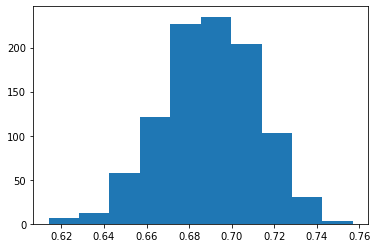

95.0 confidence interval 64.5% and 73.0%


In [8]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
data = read_csv('pima-indians-diabetes.data.csv', header=None)
values = data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))